# Rhyme

In [1]:
# !pip install -r ../requirements.txt
import sys
sys.path.append('../')
from generative_formalism import *

In [14]:
df = pd.read_csv(get_path('genai_rhyme_completions'))
df.model.value_counts()

model
ollama/llama3.1:8b                84308
ollama/olmo2:latest               80917
ollama/llama3.1:8b-text-q4_K_M    40143
deepseek/deepseek-chat            34032
claude-3-sonnet-20240229          27164
ollama/mistral:text               24164
gpt-3.5-turbo                     23201
ollama/mistral                    12933
Name: count, dtype: int64

In [12]:
postprocess_genai_rhyme_completions(df)

* Filtering out recognized completions: 100%|██████████| 11298/11298 [00:00<00:00, 18345.73it/s]


* Filtered out 140 recognized poems
* Converting to poem txt format (keeping first lines from original poem)


id_hash                                                txt  num_lines   line_sim
id_human model                          first_n_lines id                                   keep_first_n_lines                                                                                  
NaN      ollama/llama3.1:8b             5             african-american/belljame/Z200277067 True                 782567  Moments of youth, o, how swiftly they roll,\nA...         14  44.680851
         ollama/olmo2:latest            5             african-american/benjamin/Z200277076 True                 557351  Oh! you men of colour, wake to glory!\n    Too...         20  43.678161
                                                      african-american/benjamin/Z200277079 True                 531465  There are none so happy as my love and I,\n   ...         16  50.666667
                                                      african-american/benjamin/Z200277084 True                 755877  I dreamed that I loved a sweet maiden,\n    Wi...         40  59.523810
         ollama/llama3.1:8b             5             african-american/clarkben/Z300314999 True                 803391  Not unto us, but unto Thee,\n    Be endless pr...         20  56.790123
...                                                                                                                ...                                                ...        ...        ...
         ollama/llama3.1:8b-text-q4_K_M 5             modern/oxf0901/Z200245177            True                 952035  Tense your lungs against the slick\nbreathed o...         40  45.783133
         ollama/olmo2:latest            5             modern/oxf0901/Z200245180            True                 961859  Here I work in the hollow of God's hand\nwith ...         14  44.186047
                                                      modern/sci0101/Z200480979            True                 256695  blue earth\nblack water\npurple fields\nwhite ...         15  43.478261
         ollama/llama3.1:8b             5             modern/sci0101/Z200480980            True                 359275  The ventriloquist's breath;\nwatch, while my l...         24  46.376812
         ollama/olmo2:latest            5             modern/sci0101/Z200480982            True                 455593  "When first made, the squares of glass\nabout ...         85  46.753247

[11158 rows x 4 columns]

In [4]:
documentation(compute_stat_signif)
documentation(compute_all_stat_signif)

##### `compute_stat_signif`

```md

    Compute statistical significance tests between all pairs of groups in a DataFrame.

    Performs pairwise comparisons between groups using Cohen's d effect size and permutation tests.
    Returns a DataFrame with comparison results including p-values, effect sizes, and means.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing the data to analyze
    groupby : str or list of str, default='model'
        Column name(s) to group by for comparisons. If string, will be converted to list.
    valname : str, default='rhyme_pred_perc'
        Column name containing the values to compare between groups
    verbose : bool, default=DEFAULT_VERBOSE
        Whether to show progress bar during computation
    min_group_size : int, default=10
        Minimum number of samples required in each group for comparison
    group_name : str, default='group'
        Name of temporary column created to store combined group identifiers

    Returns
    -------
    pandas.DataFrame
        DataFrame with comparison results containing:
        - comparison: String describing the comparison (e.g., "group1 vs group2")
        - n1, n2: Sample sizes of each group
        - p_value: Statistical significance from permutation test
        - effect_size: Absolute Cohen's d effect size
        - effect_size_str: Categorical effect size ('', 'small', 'medium', 'large')
        - mean1, mean2: Means of each group
        - significant: Boolean indicating if p < 0.05
        - Additional columns for each grouping variable

    Calls
    -----
    - cohen_d()
    - permutation_test()
    
```
----


##### `compute_all_stat_signif`

```md

    Compute statistical significance tests for all subgroups within a DataFrame.

    Groups the DataFrame by the specified grouping variable, then runs pairwise statistical
    comparisons within each subgroup using compute_stat_signif. Useful for analyzing
    differences across different categories (e.g., periods, sources).

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing the data to analyze
    groupby : str, default='period'
        Column name to group by before running statistical comparisons
    groupby_stat : str or list of str, default='model'
        Column name(s) to use for within-group statistical comparisons
    valname : str, default='rhyme_pred_perc'
        Column name containing the values to compare between groups
    verbose : bool, default=DEFAULT_VERBOSE
        Whether to show progress bar during computation

    Returns
    -------
    pandas.DataFrame
        Concatenated DataFrame with statistical comparison results from all subgroups.
        Each row represents a pairwise comparison within a subgroup, with an additional
        'groupby' column indicating which subgroup the comparison belongs to.

    Calls
    -----
    - compute_stat_signif()
    
```
----


In [8]:
get_rhyme_for_completed_poems_as_in_paper()

* Loading legacy genai rhyme completions from {PATH_REPO}/data/data_as_in_paper/genai_rhyme_completions.csv.gz


KeyError: "None of ['id_human', 'date'] are in the columns"

In [9]:
get_rhyme_for_prompted_poems_as_in_paper()

* Collecting genai rhyme promptings as used in paper
  * Collecting from /Users/rj416/github/generative-formalism/data/data_as_in_paper/genai_rhyme_promptings.csv.gz
  * 13,849 generated responses
  * 13,700 unique responses
  * 13,700 unique poems
  * 23 unique prompts
  * 3 unique prompt types


* Getting rhymes for sample: 100%|██████████| 13838/13838 [00:02<00:00, 4701.17it/s]


,num_rhyming_lines,num_perfectly_rhyming_lines,num_lines,rhyming_line_pairs,num_lines_prosodic,perc_rhyming_lines,perc_perfectly_rhyming_lines,num_rhyming_lines_per10l,num_perfectly_rhyming_lines_per10l,rhyme_pred,rhyme_pred_perc
id,,,,,,,,,,,
6f4b2769,12.0,6.0,13.0,"[(Gentle zephyrs caress the leaves, Carrying s...",13.0,92.307692,46.153846,9,5,True,100
d026bf06,4.0,2.0,19.0,"[(The birds begin to stir, their sweet melodie...",19.0,21.052632,10.526316,2,1,False,0
512173e0,11.0,6.0,16.0,"[(In the quiet stillness of night,, A million ...",16.0,68.750000,37.500000,7,4,True,100
2212a0bf,25.0,18.0,36.0,[(In the vast expanse of time's endless scroll...,36.0,69.444444,50.000000,7,5,True,100
36ebfdac,28.0,20.0,28.0,"[(O vast and varied universe, I sing your prai...",28.0,100.000000,71.428571,10,7,True,100
...,...,...,...,...,...,...,...,...,...,...,...
484a9e9f,12.0,4.0,16.0,"[(In realms of yore, where legends roamed,, Tw...",16.0,75.000000,25.000000,8,2,False,0
c4af014c,5.0,0.0,16.0,"[(But in the quietude of the night, my mind wa...",16.0,31.250000,0.000000,3,0,False,0
1110a12e,14.0,10.0,22.0,"[(Like warp from soil, destiny does guide,, We...",22.0,63.636364,45.454545,6,5,True,100


In [4]:
# df_stats = compute_stat_signif(df, groupby=['period','subcorpus'],verbose=True)
# df_stats

In [5]:
df_smpl = get_rhyme_data_for_corpus_sampled_by_rhyme_as_in_paper(with_sample=True)
compare_rhyme_data_by_group(df_smpl, groupby='rhyme')

* Joining sample and rhyme data


,comparison,n1,n2,p_value,effect_size,effect_size_str,mean1,mean2,significant
0,y vs n,1000,1000,0.0,2.452564,large,89.7,12.2,True


In [6]:
df_smpl_by_period = get_rhyme_data_for_corpus_sampled_by_period_as_in_paper(with_sample=True)
# df_smpl_by_period_comparisons = compare_rhyme_data_by_group(df_smpl, groupby='period')
# df_smpl_by_period_comparisons

* Joining sample and rhyme data


In [7]:
df_smpl_by_period_subcorpus = get_rhyme_data_for_corpus_sampled_by_period_subcorpus_as_in_paper(with_sample=True)
# df_smpl_by_period_subcorpus_comparisons = compare_rhyme_data_by_group(df_smpl_by_period_subcorpus, groupby=['period','subcorpus'])
# df_smpl_by_period_subcorpus_comparisons

* Joining sample and rhyme data


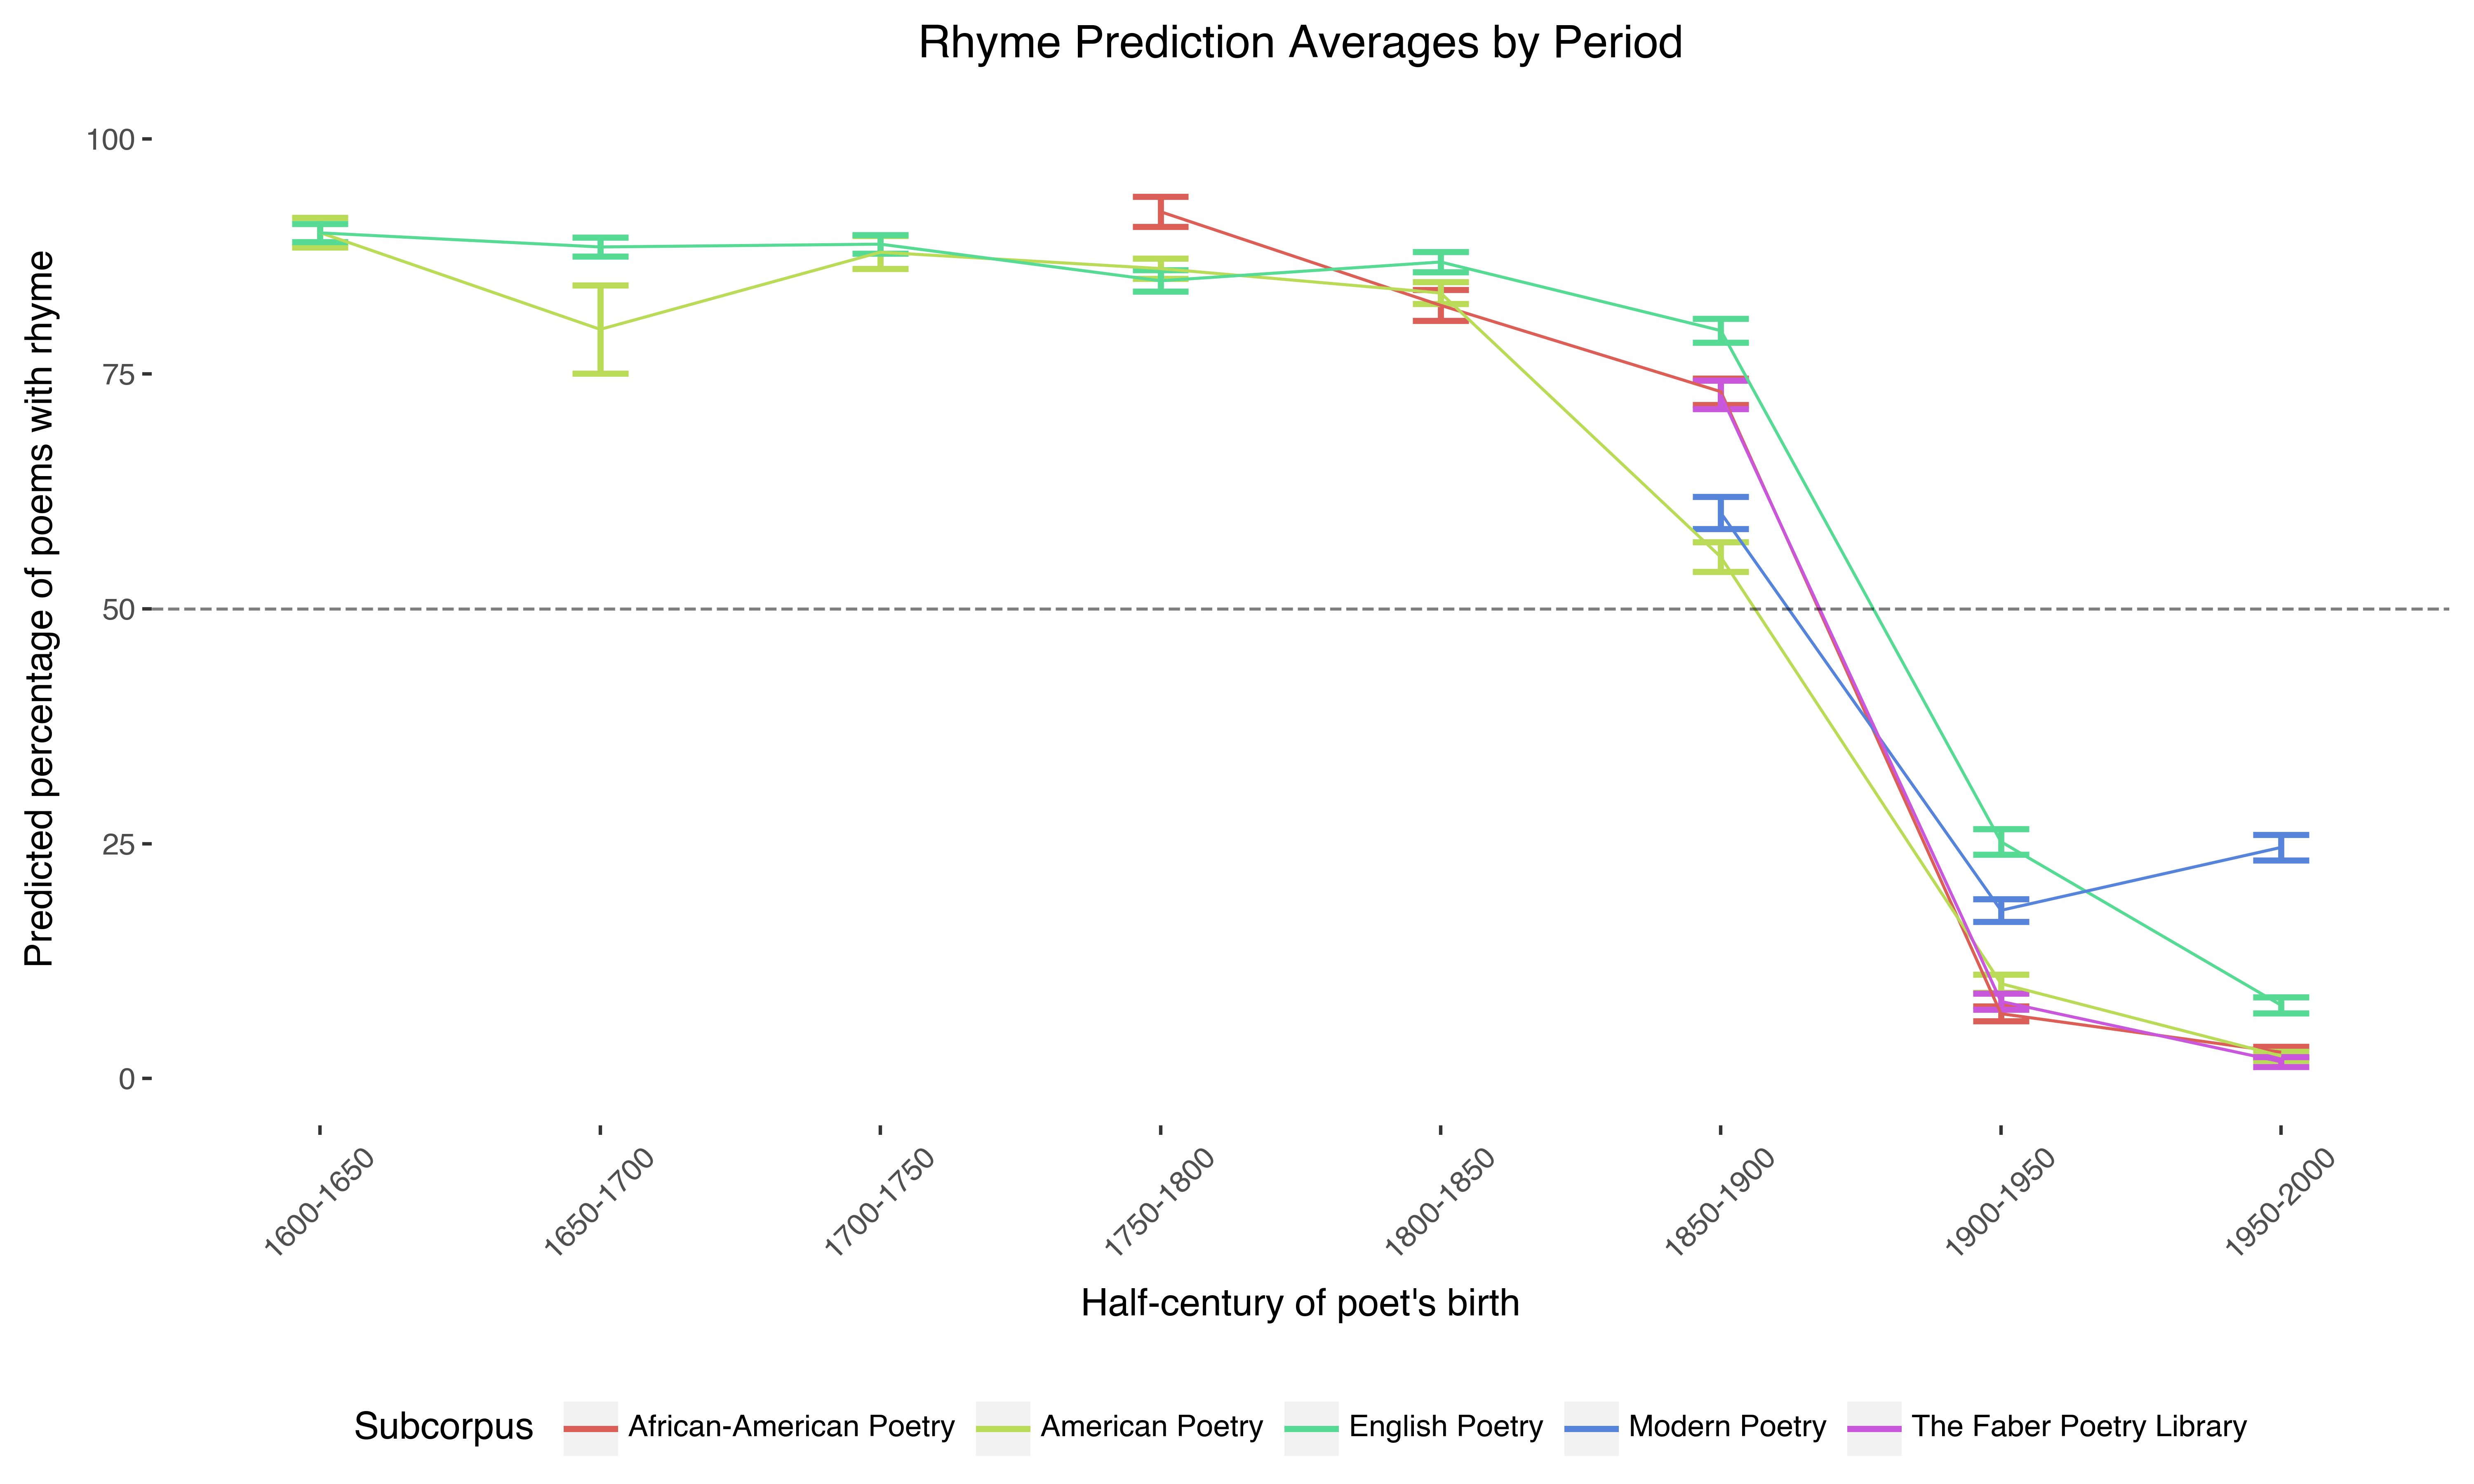

In [8]:
plot_predicted_rhyme_avgs(
    df_smpl_by_period_subcorpus,
    x='period',
    gby=['period','subcorpus'],
    color='subcorpus'
)

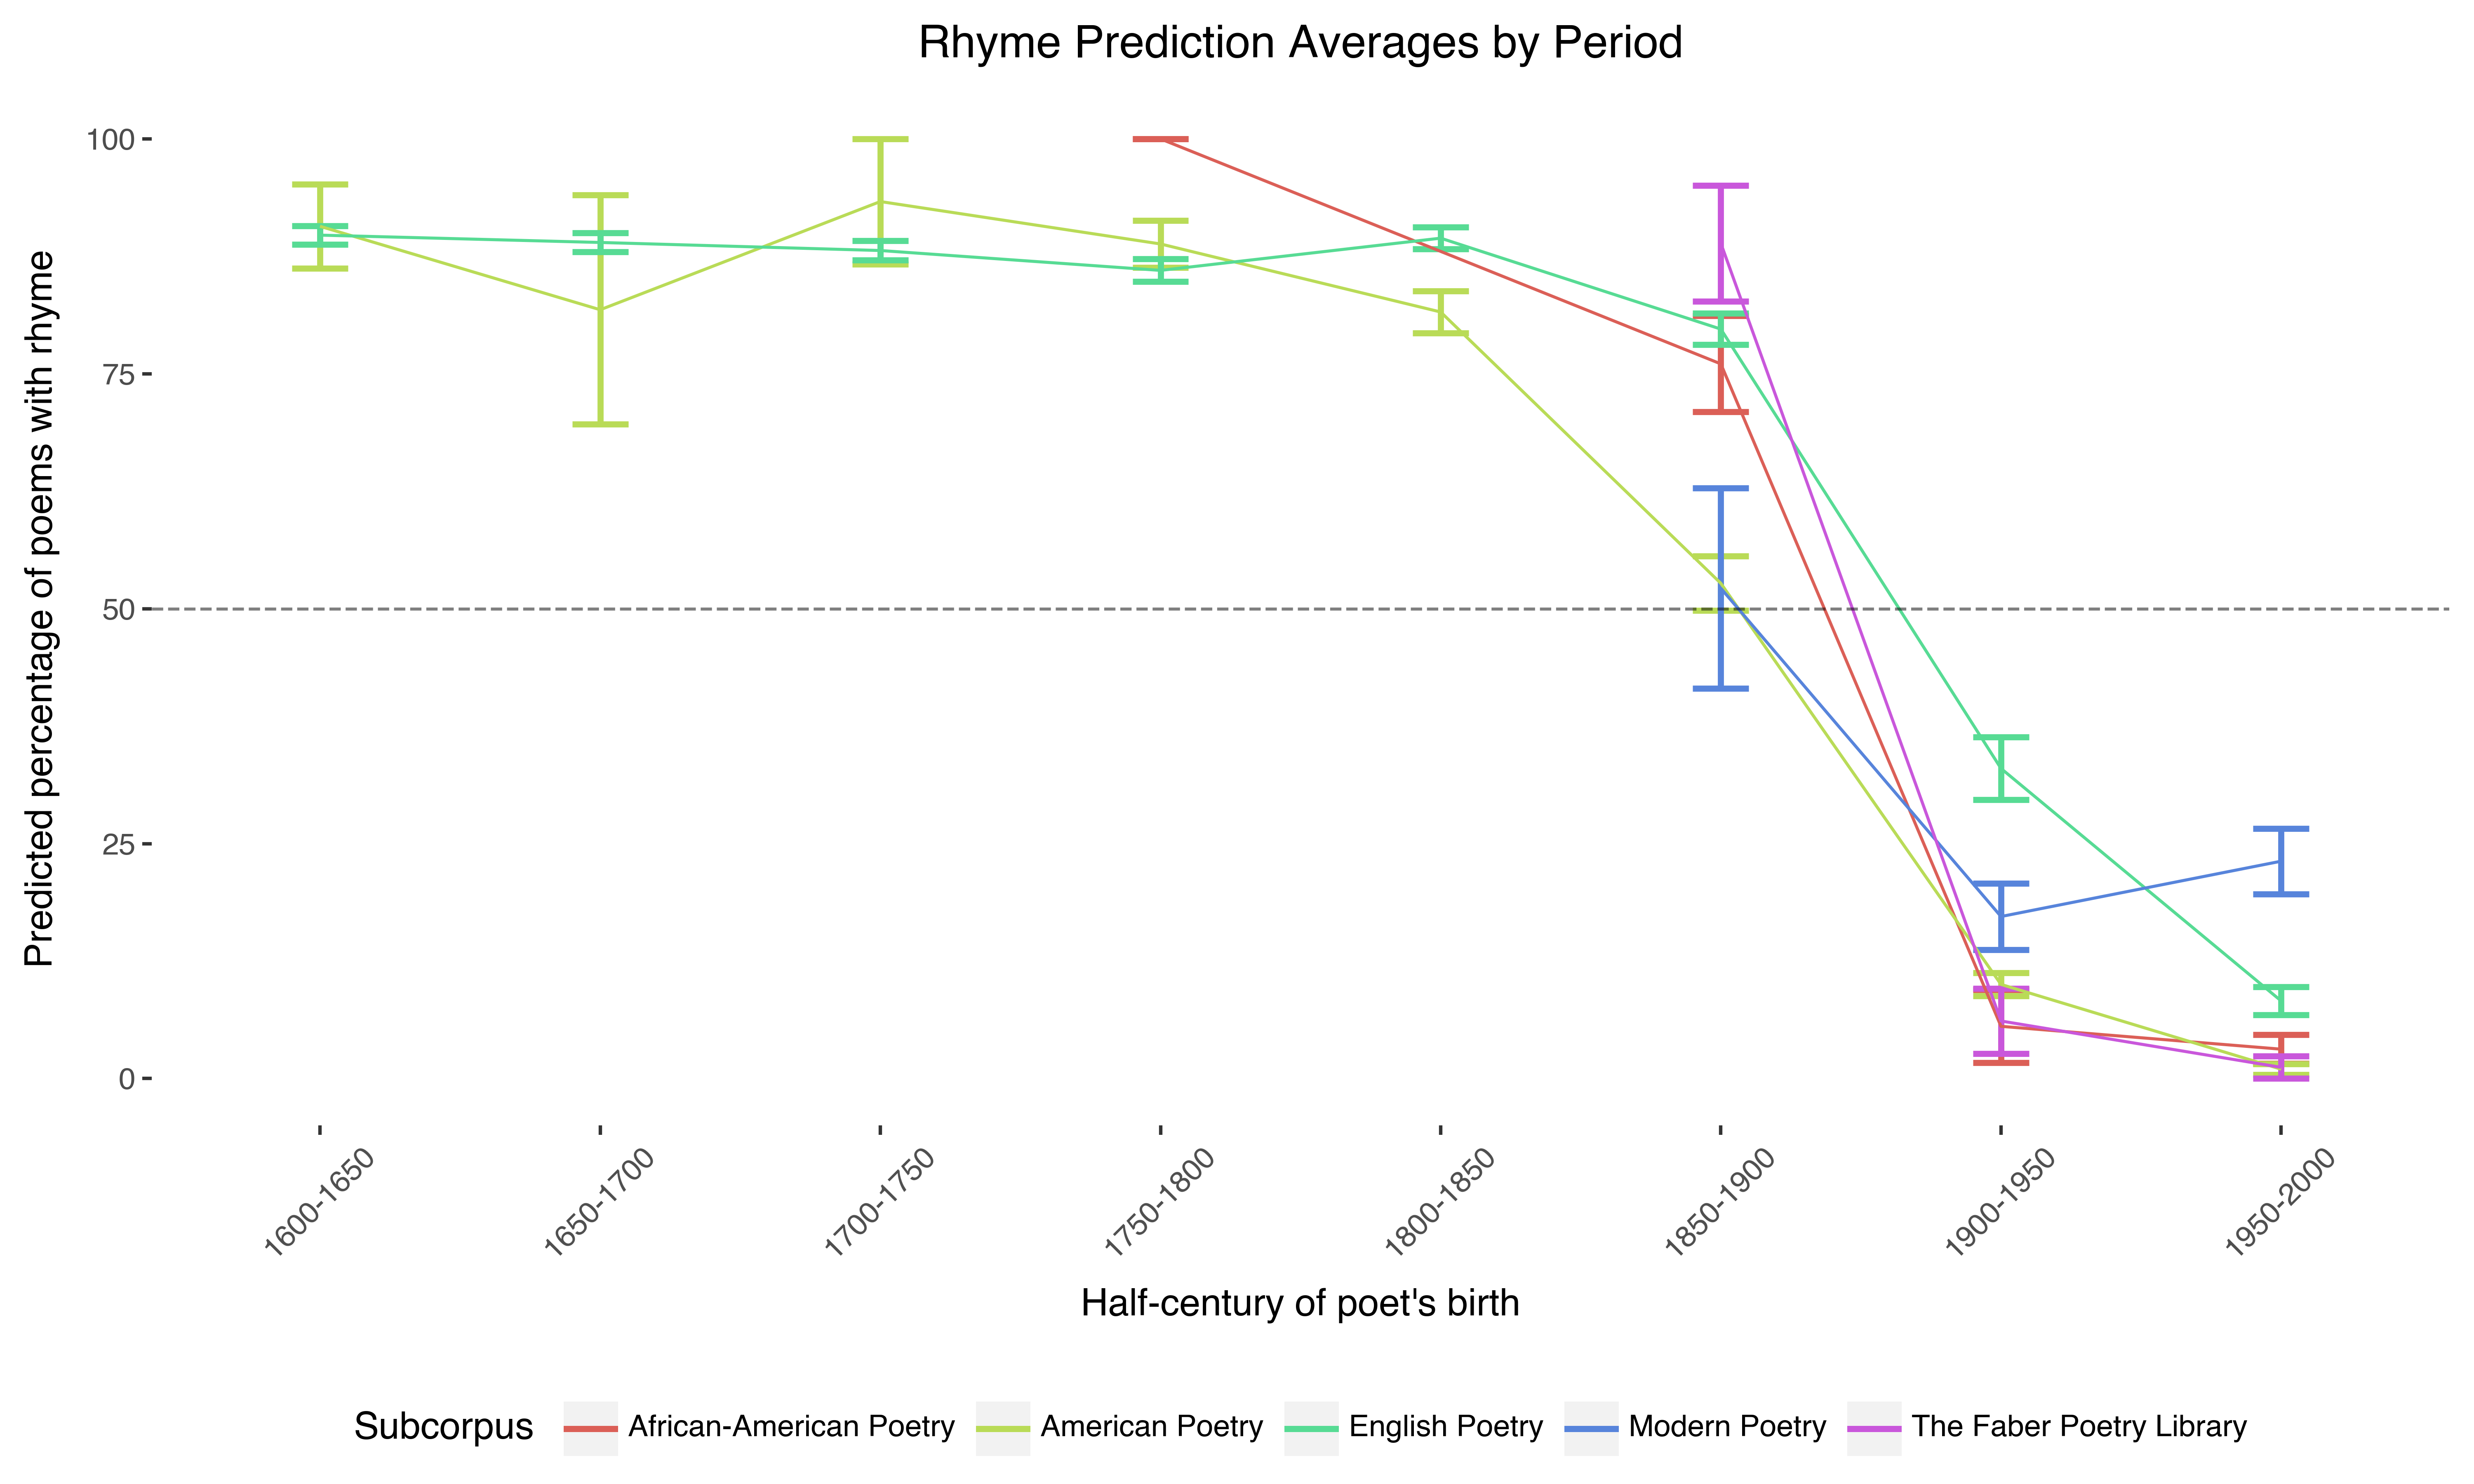

In [13]:
plot_predicted_rhyme_avgs(
    df_smpl_by_period,
    x='period',
    gby=['period','subcorpus'],
    color='subcorpus'
)

In [16]:
df_stat_signif = compute_stat_signif(df_smpl_by_period, groupby=['period'])
df_stat_signif

,comparison,n1,n2,p_value,effect_size,effect_size_str,mean1,mean2,significant
26,1600-1650 vs 1950-2000,1000,1000,0.0000,2.956645,large,89.8,7.0,True
12,1650-1700 vs 1950-2000,1000,1000,0.0000,2.860570,large,88.9,7.0,True
24,1700-1750 vs 1950-2000,1000,1000,0.0000,2.790515,large,88.2,7.0,True
17,1800-1850 vs 1950-2000,1000,1000,0.0000,2.669882,large,86.9,7.0,True
27,1750-1800 vs 1950-2000,1000,1000,0.0000,2.643619,large,86.6,7.0,True
19,1900-1950 vs 1600-1650,1000,1000,0.0000,2.252213,large,15.1,89.8,True
8,1650-1700 vs 1900-1950,1000,1000,0.0000,2.190070,large,88.9,15.1,True
18,1900-1950 vs 1700-1750,1000,1000,0.0000,2.143946,large,15.1,88.2,True
13,1800-1850 vs 1900-1950,1000,1000,0.0000,2.062911,large,86.9,15.1,True
20,1900-1950 vs 1750-1800,1000,1000,0.0000,2.044997,large,15.1,86.6,True
